<img src='logo.png' style='display: block;height: 61px;float: left;padding: .75rem 1.25rem;'>

# Desafío - Naive Bayes
* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el `.zip` a la seccióncorrespondiente.

## Descripción

* En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. Cada uno de los `csv` se encuentra en la carpeta `dump` dentro del proyecto.
* Cada csv tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras.
* En base a esta información, se les pide un modelo generativo que pueda predecir el género de una canción a patir de la letra de una canción.
* Existen 4 géneros que se registran en la base de datos, por lo que para esta actividad trabajaremos con un Multinomial Naive Bayes.

## Ejercicio 1: Preparar el ambiente de trabajo

___
* Importe los módulos `numpy` , `pandas` , `matplotlib` , `seaborn` , `glob` y `os` siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta `dump`.

> Se utilizan librerías bases para el tratamiento de datos y algunos aspectos básicos de cálculo y gráficos.

In [1]:
# Se importa libreria para el manejo de bases de datos
import pandas as pd
# Se importa libreria para el manejo de operaciones de cálculo
import numpy as np
# Se importa libreria para el manejo de gráficos
import matplotlib.pyplot as plt
# Se importa libreria para manejo de funciones estadisticas y probabilidades
import seaborn as sns
# Librería para visualizar patrones de datos perdidos
import missingno as msngo
# Se importa libreria para el menejo de warning
import warnings
# Se importa libreria para el menejo de expresiones regulares
import glob, os

> Definimos algunos aspectos de ambiente y valores por defecto.

In [2]:
# Por defecto, matplotlib crea una figura en una ventana separada.
# podemos hacer que las figuras aparezcan en línea dentro del notebook; lo hacemos ejecutando:
%matplotlib inline
# Se ignoran los warning para evitar suciedad en la ejecución
warnings.filterwarnings(action='ignore')
# Se define el estilo de gráficos a usar
plt.style.use('seaborn-pastel')
# Se define el tamaño de los paños de los gráficos por defecto
plt.rcParams['figure.figsize'] = (10, 6)
# Dado que vamos a supervisar datos no limitaremos la cantidad de columnas a mostrar en el despliegue del dataframe
pd.options.display.max_columns = None

> Se utiliza <strong>librería propia</strong> que continen funciones auxiliares, necesarias para el desarrollo de desafíos.

In [3]:
# Se importa libreria con funciones auxiliares
import ancilliary_funcs as afx

> Se utilizan librerías <strong>sklearn</strong> para el tratamiento de escala de valores de los atributos y seleccion de set de datos:

In [4]:
# Método para contar palabras y vectorizar
from sklearn.feature_extraction.text import CountVectorizer


* Para ello genere un objeto que guarde en una lista todos los archivos alojados en `dump` utilizando `glob.glob` y `os.getcwd` para extraer las rutas absolutas. Posteriormente genere un objeto `pd.DataFrame` que contenga todos los csv.
* Asegúrese de eliminar la columna `Unnamed: 0` que se genera por defecto.

In [5]:
# Generamos el listado de archivos con su path con la librería glob y lo
# almacenamos en la lista file_list
file_list = glob.glob(os.getcwd() + '/dump/*.csv')

In [6]:
# Iniciamos una lista vacia para cargar el contenido de cada archivo csv
append_csv = []
# Recorremos el listado de archivos, lo cargamos en memoria con read_csv y
# lo agregamos a la lista appappend_csv
for filename in file_list:
    append_csv.append(pd.read_csv(filename, index_col=None, header=0)
                      .drop(columns = 'Unnamed: 0')
                     )

In [7]:
# Se concatenan todos los objetos DataFrames almacenados en la lista append_csv en 1 solo DataFrame
df = pd.concat(append_csv)
# Se asigna un nombre a cada columna del DataFrame
df.columns = ['Artis', 'Genre', 'Song', 'Lyrics']

In [8]:
# Inspeccionamos los datos
df.sample(5)

,Artis,Genre,Song,Lyrics
142,The Smashing Pumpkins,rock,Glass' Theme,"Shattering fast \n I'm glass, I'm glass \n I'm..."
88,Mobb Deep,hiphop,The Illest,"(Havoc) \n Yeah, say it (say it) uh-huh \n I'm..."
116,Ghostface Killah,hiphop,Milk Crates,"""I've got the feeling... I hear the sound"" \n ..."
132,The Clash,rock,Ghetto Defendant (Edited Version),Starved in metropolis \n Hooked on necropolis ...
19,Iron Maiden,metal,Twilight Zone,She lays in bed at night and that is when I ma...


In [9]:
# Revisamos las dimensiones de la base de datos
df.shape

(9489, 4)

> La base de datos se compone de 9489 observaciones con 4 atributos. 

## Ejercicio 2: Descripción de los datos
___
* Utilizando el objeto creado en el Ejercicio 1, genere dos gráficos de barras que resuman la siguiente información:
    - La cantidad de canciones registradas por cada artista, ordenado de mayor a menor.
    - La cantidad de canciones registradas en cada género, ordenados de mayor a menor.
* Comente sobre las principales tendencias.

> __Gráfico 1__: La cantidad de canciones registradas por cada artista, ordenado de mayor a menor.

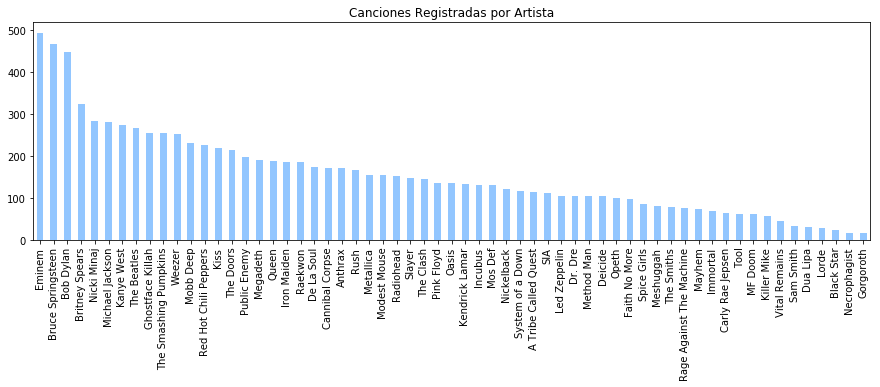

In [10]:
plt.figure(figsize=(15,4))
df["Artis"].value_counts().plot(kind='bar', title='Canciones Registradas por Artista')

>> __Eminem, Bruce Springsteen, Bob Dylan__ lideran con una discografía por sobre las 440 canciones. Lo destacado es que Eminem quien lanzó su primer singles en 1998, supere a Bruce Springsteen quien partió su carrera musical en 1073 y sigue vigente sacando discos (Western Stars: junio 2019).


> __Gráfico 2__: La cantidad de canciones registradas en cada género, ordenados de mayor a menor.

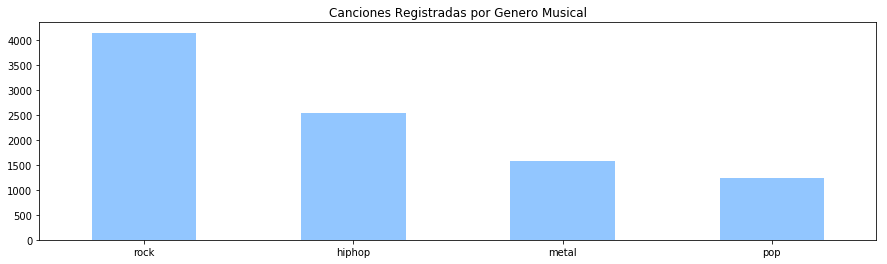

In [11]:
plt.figure(figsize=(15,4))
df["Genre"].value_counts().plot(kind='bar', rot=0, title='Canciones Registradas por Genero Musical')

> Revisamos la cantidad de Artistas para tener una idea de la muestra:

In [12]:
df["Artis"].unique()

array(['Public Enemy', 'Mayhem', 'Raekwon', 'Immortal', 'Kendrick Lamar',
       'Nicki Minaj', 'Queen', 'Radiohead', 'Iron Maiden', 'Method Man',
       'Incubus', 'The Smashing Pumpkins', 'Sam Smith', 'Oasis',
       'Bruce Springsteen', 'System of a Down', 'Faith No More',
       'Spice Girls', 'Mobb Deep', 'Tool', 'Cannibal Corpse',
       'Black Star', 'Megadeth', 'Ghostface Killah', 'Britney Spears',
       'Anthrax', 'Led Zeppelin', 'Kanye West', 'Killer Mike', 'Opeth',
       'Carly Rae Jepsen', 'Rage Against The Machine', 'The Smiths',
       'Rush', 'Gorgoroth', 'Lorde', 'SIA', 'Metallica', 'Eminem',
       'The Doors', 'Slayer', 'The Clash', 'Modest Mouse',
       'A Tribe Called Quest', 'Pink Floyd', 'Deicide', 'Kiss', 'MF Doom',
       'Necrophagist', 'Bob Dylan', 'Weezer', 'Dua Lipa', 'Dr. Dre',
       'Michael Jackson', 'De La Soul', 'Nickelback',
       'Red Hot Chili Peppers', 'Meshuggah', 'The Beatles',
       'Vital Remains', 'Mos Def'], dtype=object)

In [13]:
len(df["Artis"].unique())

61

In [14]:
# Revisamos como se balancea la cantidad de artistas a través de las clases
df.loc[:,['Genre', 'Artis']].groupby('Genre')['Artis'].nunique().sort_values(ascending=False)

Genre
rock      22
metal     15
hiphop    15
pop        9
Name: Artis, dtype: int64

* Comentario de las principales tendencias:
>
> Tenemos 9489 canciones distribuidas en 61 artistas, de los cuales 22 pertenecen al genero Rock, 15 al Metal, 15 al Hiphop y sólo 9 al pop.
>
> _Gráfico 1_: __Eminem, Bruce Springsteen, Bob Dylan__ lideran con una discografía por sobre las 440 canciones. Lo destacado es que Eminem quien lanzó su primer singles en 1998, supere a Bruce Springsteen quien partió su carrera musical en 1073 y sigue vigente sacando discos (Western Stars: junio 2019). Por otro parte el el grupo Aleman de Death Metal Técnico __Necrophagist__ es el artista con menos canciones dada su corta discografía.
>
>
> _Gráfico 2_: Se observa que la base de datos está cargada al __rock__ (puede ser que la empresa donde se capturaron los nombres de los artistas usen el tipo musical para filtrar en las entrevistas de trabajo). El __pop__ es la clase que tiene menos observaciones y es debido a que hay menos artistas.

## Ejercicio 3: Matriz de ocurrencias


>__Digresión: Tokenización de Textos__
>
>Para poder trabajar con textos, debemos pasarlos a una __matriz dispersa__, donde cada fila representará una >entrada (en este caso, una canción), y cada columna __representará una palabra (token)__. Este es el proceso de >tokenización: Identificar la ocurrencia de una palabra específica dentro de un conjunto de textos (corpus). El >tokenizador más simple
>`sklearn.feature_extraction.text.CountVectorizer` genera una colección de textos a una matriz que representa la >frecuencia __dentro del texto__ de una palabra específica. El tokenizador funciona de la siguiente manera:
>
>~~~python
>from sklearn.feature_extraction.text import CountVectorizer 
># instanciamos un objeto
>count_vectorizer = CountVectorizer(stop_words = 'english')
># Implementamos los pasos fit y transform
>count_vectorizer_fit = count_vectorizer.fit_transform(lista_de_textos)
># Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names()
># extraemos frecuencia
>words_freq = count_vectorizer_fit.toarray().sum(axis = 0)
>~~~

* Importe la clase `CountVectorizer` dentro de los módulos `feature_extraction.text` de la librería `sklearn`. Lea la documentación asociada a ésta. ¿Cuál es el objetivo de esta clase?

> __Respuesta__: El objetivo de la clase count_vectorizer es convertir los textos en vectores de recuento de palabras.

In [15]:
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer_fit = count_vectorizer.fit_transform(df['Lyrics'])

* Aplique la clase para extraer las 100 palabras más repetidas en toda la base de datos.

In [16]:
words = count_vectorizer.get_feature_names()
words_count = count_vectorizer_fit.toarray().sum(axis=0)
df_words = pd.DataFrame({'word': words, 'count': words_count})
df_words_100 = df_words.sort_values(by='count', ascending=False).head(100)

In [17]:
df_words_100.transpose()

,24950,12859,23856,18439,23287,25479,48591,25165,29851,7009,43795,24735,8724,26067,1265,25969,3022,47086,37216,36025,38497,46260,47265,24875,47080,18334,48695,15760,28852,17232,43070,29103,14110,48490,10951,2927,48229,18344,43452,29125,25341,25133,36900,18004,20080,18456,48113,29108,18243,27329,19754,15299,34652,4460,41368,29000,4170,25313,4392,31547,30005,34677,19677,27807,25138,19744,20411,1202,15340,2519,4251,12035,20353,12054,3128,24080,43449,36670,44828,36254,45178,24911,44953,10993,24571,20258,19457,18326,44032,43768,20131,5354,40164,22016,14892,11041,24615,43442,14305,41068
word,like,don,know,got,just,love,yeah,ll,oh,cause,time,let,come,man,ain,make,baby,want,say,right,shit,ve,way,life,wanna,gonna,yo,feel,need,fuck,tell,nigga,em,ya,day,away,world,good,think,night,look,little,said,girl,hey,gotta,won,niggas,god,mind,heart,eyes,real,black,stop,new,better,long,bitch,people,ooh,really,head,money,live,hear,home,ah,face,ass,big,did,hold,die,bad,la,things,run,try,rock,uh,light,turn,dead,leave,hit,hard,gone,tonight,till,high,boy,soul,inside,everybody,death,left,thing,end,stay
count,19629,17398,14962,14171,13978,11268,11071,10028,9879,8356,8037,8009,7866,7467,7323,6821,6735,6698,6684,6207,6128,5924,5713,5710,5356,5121,4859,4704,4579,4537,4533,4334,4292,4222,4217,4126,4106,3910,3902,3835,3805,3708,3692,3618,3341,3272,3161,3057,3011,3000,2861,2857,2846,2832,2811,2803,2801,2781,2756,2739,2719,2681,2669,2551,2544,2529,2503,2476,2437,2421,2363,2359,2326,2303,2217,2202,2186,2176,2165,2165,2146,2101,2078,2076,2056,2048,2037,2016,2010,2003,1989,1971,1921,1915,1903,1897,1895,1882,1829,1828


> Podemos ver que las palabras que más se repiten entre todas las canciones de nuestra base de datos, con mas de 10.000 apariciones son: __like, don, know, got, just, love yeah, ll__.

* Genere una función que replique el procedimiento para cada uno de los géneros.

In [18]:
def word_count_by(df, text_column, by_column, by_value, top = 10):
    """
    Descripción: Se cuentan las palabras de la columna [text_column], agrupando por 
    la columna [by_column] y cortando la data por el valor [by_value], y como resultado
    se entrega un DataFrame con 3 columnas [genre, word, count].
    Entrada:
        df, [DataFrame] que almacena la data a evaluar
        text_column, [String] que indica el nombre de la columna que contiene el texto
        by_column, [String] que indica el nombre de la columna por la cual se agrupará
        el conteo de palabras.
        by_value, [String] que indica el valor considerado en el conteo.
        top, [Int] que indica la cantidad de datos a mostrar en el gráfico. Por defecto es 10
    Salida:
        df_words_top, [DataFrame] con 3 columnas [genre: nombre del genero musical,
        word: palabra encontrada en las letras de la canción, count: cantidad de veces que se encontró
        la palabra en las leras de las canciones del genero]
    """
    count_vectorizer = CountVectorizer(stop_words='english')
    count_vectorizer_fit = count_vectorizer.fit_transform(df[df[by_column]==by_value][text_column])
    words = count_vectorizer.get_feature_names()
    words_freq = count_vectorizer_fit.toarray().sum(axis=0)
    df_words = pd.DataFrame({'genre': by_value,'word': words, 'count': words_freq})
    df_words_top = df_words.sort_values(by='count', ascending=False).head(top)
    return df_words_top

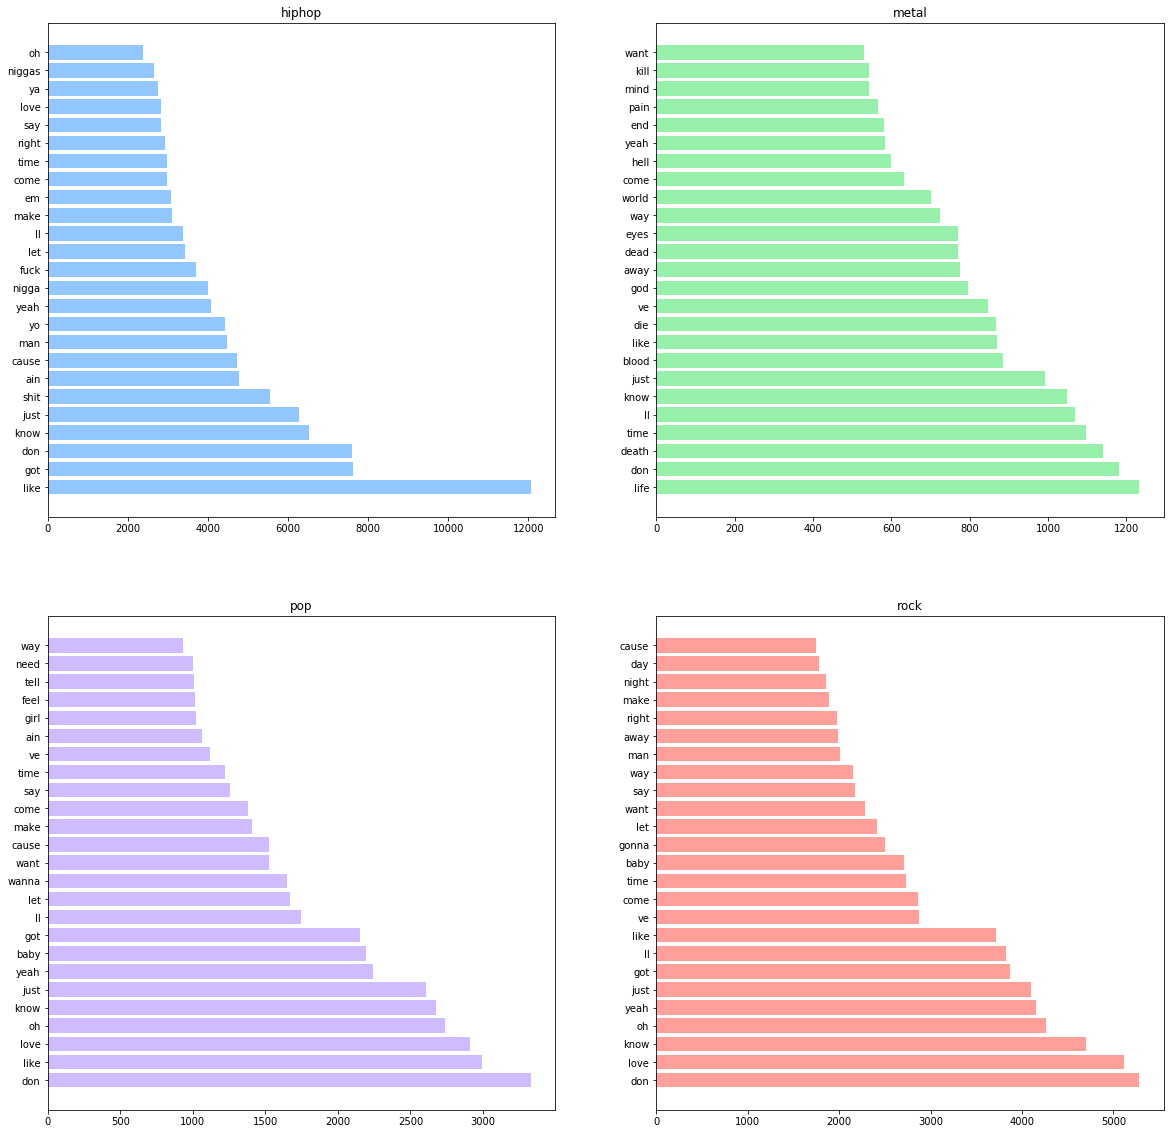

In [19]:
# Generamos una lista con nuestras clases
genres = ['hiphop', 'metal', 'pop', 'rock']
# Generamos una lista con los colores asociados a las clases, para mantener
# consistencia en el discurso del notebook
colors = ['#92c6ff', '#97f0aa', '#d0bbff', '#ff9f9a']
# Seteamos el tamaño del paño del gráfico
plt.figure(figsize=(20, 20))
# Almacenamos los dataframes top por clases en una lista, para luego tratarlos
wc_by_class = []
# Recorremos las clases y vamos obteniendo las palagras que más se repiten con 
# la función word_count_by
for index, genre in enumerate(genres):
    # Generamos una matriz de graficos de 2 x 2
    plt.subplot(2, 2, index + 1 )
    # Obtenemos un DataFrame con el top X de palabras más repetidas en el genero
    df_wc = word_count_by(df, text_column = 'Lyrics', by_column = 'Genre', by_value=genre, top = 25)
    # Se almacena el DataFrame para trabajarlo posteriormente
    wc_by_class.append(df_wc)
    # Se genera un gráfico de barras horizontales para mostrar el conteo de palabras, por genero.
    plt.barh(df_wc['word'], df_wc['count'], color=colors[index])
    # Se agrega el título del cada gráfico
    plt.title(genre)

> Mediante los gráficos anteriores podemos apoyar el análisis independiente por genero, donde vemos que:
>
>El __Hip Hop__ se ha basado en su propia variante del lenguaje inglés materializada en el African American Vernacular English.
>
>El __Metal__, tiende a tocar temas relacionados con el lado oscuro y filosóficos (Satán, Sangre, Muerte).
>
>El __Rock__ & __Pop__, tienden a tocar las mismas palabras tocando temas más cotidianos y de entendimiento común.

___
> Para un análisis en conjunto de los 4 generos realizaremos un gráfico de barras apiladas, lo que nos permitirá observar palabras comunes.

In [20]:
# Juntamos los 4 dataframes en 1
df_wc_all = pd.concat(wc_by_class)
# Usamos el método Pivot para organizar los datos de acuerdo a como lo necesitamos para graficar.
pivot_df = df_wc_all.pivot(index='word', columns='genre', values='count')

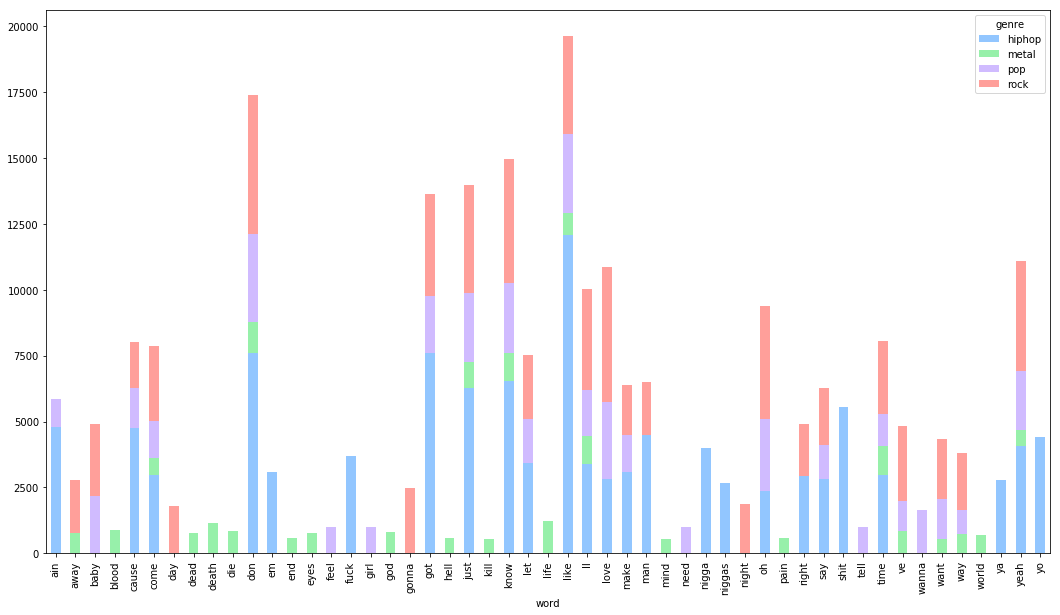

In [21]:
# Generamos el gráfico de barras apilado
pivot_df.loc[:, genres].plot.bar(stacked=True, figsize=(18,10), colors=colors)

> Podemos observar que la lista se reduce a __51__ palabras en los 4 generos y que las palabras __like, don, know, got, just, love yeah, ll__ (sobre 10.000 apariciones) son top 25 en los 4 generos, a excepción de got que no es tan frecuente en el genero metal.

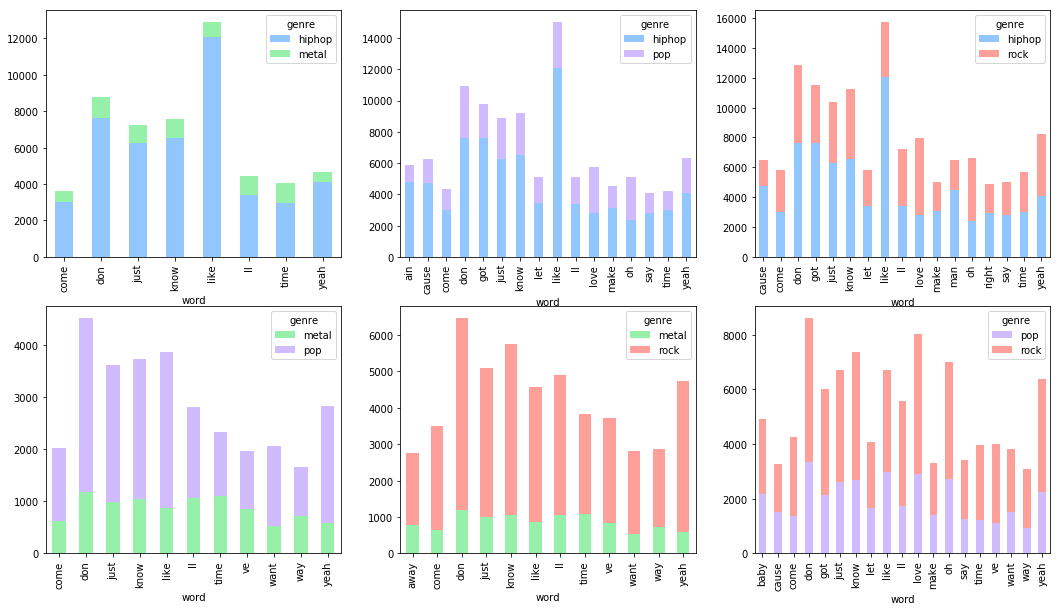

In [22]:
# Generamos el gráfico de barras apilado comparando dos clases
count = 0
# Generamos nuestro paño de gráfico
fig, axes = plt.subplots(2, 3)
# Lista que almacena la combinación para no repetir la comparación en distinto orden
incluidas = []
# Recorremos las 4 clases
for g1 in genres:
    # Recorremos las 4 clases
    for g2 in genres:
        # Filtramos la comparación entre clases y las ya comparadas en otro orden
        if g1 != g2 and (g2+g1) not in incluidas:
            # calculamos la fila
            row = int(count / 3)
            # calculamos la columna
            col = count % 3
            # Generamos nuestro gráfico apilado comparando las dos clases (g1, g2)
            # mantenemos los colores basandonos en nuestra paleta de colores y
            # el indice de las clases g1 y g2
            pivot_df.loc[:, [g1,g2]].dropna().plot.bar(stacked=True, 
                                                       ax=axes[row, col], 
                                                       figsize=(18, 10), 
                                                       colors = (colors[genres.index(g1)]
                                                                 , colors[genres.index(g2)]
                                                                )
                                                      )
            # Aumentamos nuestro contador
            count=count+1
            # Incluimos nuestro par de clases para no repetirla en el futuro
            incluidas.append(g1+g2)

* Comente sobre las principales características de cada género en cuanto a sus palabras.

> Podemos observar que las palabras like, don, know, got, just, love yeah, ll (sobre 10.000 apariciones) son top 25 en los 4 generos, a excepción de got que no es tan frecuente en el genero metal.
>
> __Hiphop__ y __Metal__: no suelen compartir muchas palabras, son los géneros más distantes en cuanto a compartir palabras (sólo 8 npalabras del top 25 se comparten y la aparición en Metal es baja).
>
> __Roc__ y __Pop__: son los generos que más palabras comparten (19 de las 25 palabras con mayor apariciones son comunes entre ambos)
>
> __Hiphop__ y [__Roc__ & __Pop__]: Comparten sobre un 60% de las palabras (entre 16 y 17 de las 25).
>
> __Metal__ y [__Roc__ & __Pop__]: Comparten menos del 50% de las palabras (entre 11 y 12 de las 25).

## Ejercicio 4: Entrenamiento del Modelo

>__Digresión: `sklearn` Pipelines__
>
>La clase `Pipeline` del módulo `sklearn.pipeline` permite concatenar múltiples pasos deprocesamiento y preprocesamiento en un estimador generado por algún método de `scikit-learn`. En sí, la clase cuenta con los métodos clásicos `fit`, `predict` y `score` y presenta un comportamiento idéntico a los demás objetos de `scikit-learn`. Uno de los usos más comunes es para concatenar pasos de preprocesamiento con un modelo.
>
>__Componentes de un `Pipeline`__
>
>Imaginemos que deseamos implementar el siguiente modelo. Considerando un conjunto dedatos, deseo __Estandarlizarlo__,  posteriormente __extraer sus  principales componentes__  y finalmente __aplicar un modelo de regresión lineal__. Este flujo se puede reexpresar como:
>
>~~~python
>pipeline_model = Pipeline([('scale', StandardScaler()),
>                        ('pca', RandomizedPCA(n_components=3)),
>                        ('model', LinearRegression())])
>~~~
>
>Algunos de los elementos a considerar:
>
>1. Cada paso se considera como una tupla, donde se declara el nombre del paso y la funcióna implementar. En este caso, nuestro primer paso es estandarizar la matriz, por lo queasociamos el método `StandardScaler` con el string `scale`.
>
>2. Todos los pasos declarados se incorporan en una lista, donde el orden de ingresorepresenta el orden de ejecución.
>
>Posteriormente el objeto creado puede utilizarse con los siguientes métodos
>
>~~~python
>pipeline_model.fit(X_train, y_train)
>y_hat = pipeline_model.predict(y_test)
>~~~

* Importe `MultinomialNB`, `train_test_split`, `Pipeline`, `confusion_matrix` y `classification_report`.

In [23]:
from sklearn.naive_bayes import MultinomialNB
# Método para la selección de datos entre entrenamiento y test
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

* Genere las muestras de entrenamiento y validación reservando un 40% para validación y declarando una semilla pseudoaleatoria

In [24]:
# Generamos una división de los datos
X_train, X_test, y_train, y_test = train_test_split(df['Lyrics'], 
                                                    df['Genre'], 
                                                    test_size=.4, 
                                                    random_state=14173)

* Monte el modelo dentro de un `Pipeline`, donde el primer paso es implementar `CountVectorizer` y el segundo sea ejecutar el clasificador `MultinomialNB`.

In [25]:
# Con pipeline genero una secuencia de ejecución para poder pre-procesar mis datos antes de pasarlo al modelo.
pipelined_mnb = Pipeline([('countvec', CountVectorizer(stop_words='english')),
                          ('multinom_nb', MultinomialNB())
                         ])

In [26]:
model = pipelined_mnb.fit(X_train, y_train)

* A continuación se les presenta una lista de letras, ¿cuáles serían las prediccionescorrespondientes?
>~~~python
>['I got a place in the underworld', # Brody Dalle - Underworld
  'As veils of ignorance, hatred retains Storm of arrows through karma Seekinglight through samsara', # Gorguts - Forgotten Arrows
  "Bye bye Don't want to be a fool for you Just another player in your game fortwo You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
  'Move bitch, get out the way Get out the way bitch, get out the way Movebitch, get out the way Get out the way bitch, get out the way', # Ludacris -Move B*tch
  'Sexual violence doesn’t start and end with rape It starts in our books andbehind our school gates', # IDLES - Mother
  "Take it from the girl you claimed to love You gonna get some bad karma I'mthe one who had to learn to \
  build a heart made of armor From the girl who made you soup and tied yourshoes when you were hurting \
  You are not deserving, you are not deserving" #Banks -Drowning
]
>~~~

In [27]:
# Declaramos una lista con los valores reales
demo_class = ['rock', 'metal', 'pop', 'hiphop', 'rock', 'pop']
# Declaramos una lista con el artista y el tema. Mantenemos el orden en las listas
demo_artis = ['Brody Dalle - Underworld', 
              'Gorguts - Forgotten Arrows', 
              "N'SYNC - Bye Bye Bye", 
              'Ludacris -Move B*tch', 
              'IDLES - Mother', 
              'Banks -Drowning']
# Almacenamos los textos en una variable para poder predecir
demo_text = ['I got a place in the underworld', # Brody Dalle - Underworld
             'As veils of ignorance, hatred retains Storm of arrows through karma Seekinglight through samsara', # Gorguts - Forgotten Arrows
             "Bye bye Don't want to be a fool for you Just another player in your game fortwo You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
             'Move bitch, get out the way Get out the way bitch, get out the way Movebitch, get out the way Get out the way bitch, get out the way', # Ludacris -Move B*tch
             'Sexual violence doesn’t start and end with rape It starts in our books andbehind our school gates', # IDLES - Mother
             "Take it from the girl you claimed to love You gonna get some bad karma I'mthe one who had to learn to \
             build a heart made of armor From the girl who made you soup and tied yourshoes when you were hurting \
             You are not deserving, you are not deserving" #Banks -Drowning
            ]
# Predecimos mediante nuestro modelo MultinomialNB
pr_demo = model.predict(demo_text)

> Reportamos como nos fue en la predicción con nuestro modelo:

In [28]:
def report_class_predict(id_song, real_class, pr_class):
    CRED = '\033[91m'
    OKGREEN = '\033[92m'
    CEND = '\033[0m'
    for i in range(len(id_song)):
        if real_class[i] != pr_class[i]:
            print(f"{id_song[i]}: {CRED}ERROR clase real: {real_class[i]}, clase predicha: {pr_class[i]} {CEND}")
        else:
            print(f"{id_song[i]}: {OKGREEN}OK clase real: {real_class[i]}, clase predicha: {pr_class[i]} {CEND}")

In [29]:
report_class_predict(demo_artis, demo_class, pr_demo)

Brody Dalle - Underworld: OK clase real: rock, clase predicha: rock 
Gorguts - Forgotten Arrows: OK clase real: metal, clase predicha: metal 
N'SYNC - Bye Bye Bye: ERROR clase real: pop, clase predicha: rock 
Ludacris -Move B*tch: ERROR clase real: hiphop, clase predicha: pop 
IDLES - Mother: ERROR clase real: rock, clase predicha: metal 
Banks -Drowning: ERROR clase real: pop, clase predicha: rock 


> Podemos observar que el modelo predice menos del 50% de los datos (2 de 6).

* Genere una predicción implementando la muestra de validación y contraste las predicciones del modelo con las etiquetas verdaderas. Reporte las principales métricas.

In [30]:
pr_class = model.predict(X_test)

In [31]:
# Reportamos el resultado de la predicción
report_class_predict(np.array(y_test), np.array(y_test), pr_class)

rock: OK clase real: rock, clase predicha: rock 
metal: ERROR clase real: metal, clase predicha: hiphop 
metal: ERROR clase real: metal, clase predicha: hiphop 
rock: OK clase real: rock, clase predicha: rock 
metal: OK clase real: metal, clase predicha: metal 
metal: ERROR clase real: metal, clase predicha: rock 
hiphop: OK clase real: hiphop, clase predicha: hiphop 
hiphop: OK clase real: hiphop, clase predicha: hiphop 
hiphop: OK clase real: hiphop, clase predicha: hiphop 
hiphop: OK clase real: hiphop, clase predicha: hiphop 
rock: OK clase real: rock, clase predicha: rock 
rock: ERROR clase real: rock, clase predicha: metal 
metal: ERROR clase real: metal, clase predicha: hiphop 
rock: OK clase real: rock, clase predicha: rock 
rock: OK clase real: rock, clase predicha: rock 
hiphop: ERROR clase real: hiphop, clase predicha: rock 
hiphop: OK clase real: hiphop, clase predicha: hiphop 
rock: OK clase real: rock, clase predicha: rock 
hiphop: OK clase real: hiphop, clase predicha: h

hiphop: OK clase real: hiphop, clase predicha: hiphop 
hiphop: OK clase real: hiphop, clase predicha: hiphop 
rock: OK clase real: rock, clase predicha: rock 
pop: ERROR clase real: pop, clase predicha: rock 
hiphop: OK clase real: hiphop, clase predicha: hiphop 
metal: ERROR clase real: metal, clase predicha: rock 
rock: OK clase real: rock, clase predicha: rock 
metal: ERROR clase real: metal, clase predicha: rock 
rock: OK clase real: rock, clase predicha: rock 
rock: OK clase real: rock, clase predicha: rock 
metal: ERROR clase real: metal, clase predicha: rock 
rock: OK clase real: rock, clase predicha: rock 
rock: OK clase real: rock, clase predicha: rock 
metal: OK clase real: metal, clase predicha: metal 
hiphop: OK clase real: hiphop, clase predicha: hiphop 
rock: OK clase real: rock, clase predicha: rock 
rock: OK clase real: rock, clase predicha: rock 
rock: OK clase real: rock, clase predicha: rock 
hiphop: ERROR clase real: hiphop, clase predicha: rock 
pop: OK clase real:

In [32]:
# Revisamos la matriz de confusión
confusion_matrix(y_test, pr_class)

array([[ 953,    3,   12,   59],
       [  25,  448,    6,  147],
       [  64,    7,  189,  223],
       [  82,   81,   67, 1430]])

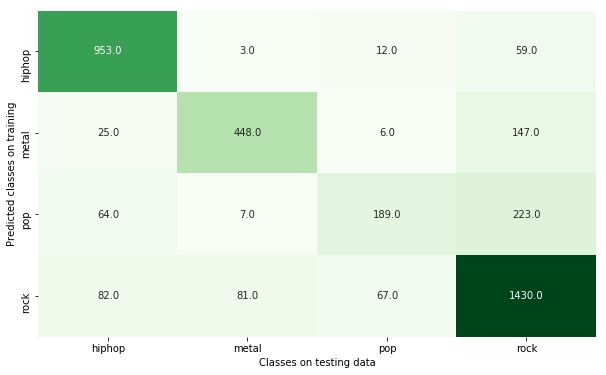

In [33]:
afx.plot_confusion_matrix(y_test, pr_class, genres)

> De la matriz de confusión se desprende que la diagonal no está mala, pero hay valores altos cuando se tienen clases rock y se predicen como pop o metal.

In [34]:
print(classification_report(y_test, pr_class))

              precision    recall  f1-score   support

      hiphop       0.85      0.93      0.89      1027
       metal       0.83      0.72      0.77       626
         pop       0.69      0.39      0.50       483
        rock       0.77      0.86      0.81      1660

    accuracy                           0.80      3796
   macro avg       0.78      0.72      0.74      3796
weighted avg       0.79      0.80      0.79      3796



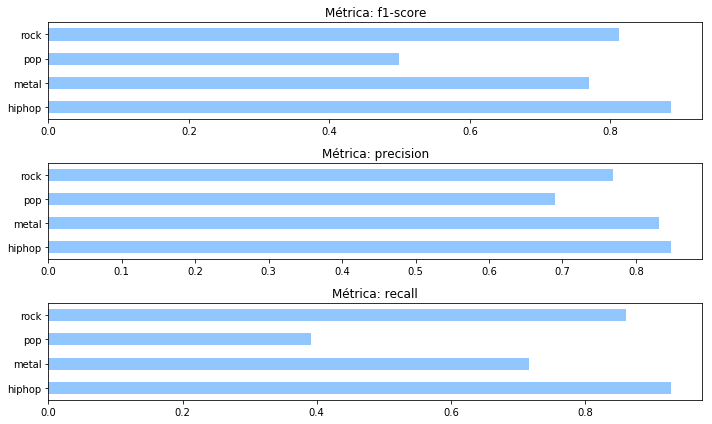

In [35]:
afx.plot_class_report(y_test, pr_class, genres)

> Podemos observar que F1 es bastante bueno para las clases __hiphop__, __rock__ y __metal__, pero no es bueno para la clase __pop__. Debemos recordar que la muestra tenía comparativamente menos datos clasificados como __pop__.

## Ejercicio 5: Mejora del Modelo

* Proponga una estrategia para mejorar el desempeño del modelo en la categoría con peores métricas.

> Se propone balancear la muestra agregando más datos clasificados como __pop__.

* Repita los pasos de entrenamiento y reporte de métricas, esta vez incluyendo los nuevos datos suministrados.

In [36]:
# Generamos el listado de archivos con su path con la librería glob y lo
# almacenamos en la lista file_list_ppop
file_list_ppop = glob.glob(os.getcwd() + '/dump_plus_pop/*.csv')


In [37]:
# Iniciamos una lista vacia para cargar el contenido de cada archivo csv
append_csv_ppop = []
# Recorremos el listado de archivos, lo cargamos en memoria con read_csv y
# lo agregamos a la lista append_csv_ppop
for filename in file_list_ppop:
    append_csv_ppop.append(pd.read_csv(filename, index_col=None, header=0)
                      .drop(columns = 'Unnamed: 0')
                     )

In [38]:
# Se concatenan todos los objetos DataFrames almacenados en la lista append_csv en 1 solo DataFrame
df_ppop = pd.concat(append_csv_ppop)
# Se asigna un nombre a cada columna del DataFrame
df_ppop.columns = ['Artis', 'Genre', 'Song', 'Lyrics']

In [39]:
# Inspeccionamos los datos
df_ppop.sample(5)

,Artis,Genre,Song,Lyrics
44,Justin Timberlake,pop,True Blood,"Give it to me, there goes the boogie, there go..."
102,Dr. Dre,hiphop,World Class,"We call him Yella, he is the best \n He rocks ..."
146,Metallica,metal,ManUNkind,Chaos \n Awaiting for Adam's return \n Madness...
95,The Doors,rock,Hyacinth House,"Unfortunately, we are not licensed to display ..."
29,Immortal,metal,Noctambulant,Shadowed you fall \n Iced soul in the shiverin...


In [40]:
# Revisamos las dimensiones de la base de datos
df_ppop.shape

(10804, 4)

> La base de datos se compone de 10804 observaciones (1315 observaciones más que la base anterior) con 4 atributos. 

In [41]:
# Generamos una división de los datos
X_train_ppop, X_test_ppop, y_train_ppop, y_test_ppop = train_test_split(df_ppop['Lyrics'], 
                                                    df_ppop['Genre'], 
                                                    test_size=.4, 
                                                    random_state=14173)

In [42]:
# Entrenamos un nuevo modelo con la nueva muestra (más datos clasificados como pop)
model_ppop = pipelined_mnb.fit(X_train_ppop, y_train_ppop)

In [43]:
# Predecimos las clases
pr_class_ppop = model_ppop.predict(X_test_ppop)

In [44]:
# Reportamos el resultado de la predicción
report_class_predict(np.array(y_test_ppop), np.array(y_test_ppop), pr_class_ppop)

rock: ERROR clase real: rock, clase predicha: pop 
pop: OK clase real: pop, clase predicha: pop 
pop: OK clase real: pop, clase predicha: pop 
rock: OK clase real: rock, clase predicha: rock 
rock: ERROR clase real: rock, clase predicha: pop 
pop: ERROR clase real: pop, clase predicha: rock 
rock: OK clase real: rock, clase predicha: rock 
metal: ERROR clase real: metal, clase predicha: rock 
pop: OK clase real: pop, clase predicha: pop 
rock: OK clase real: rock, clase predicha: rock 
hiphop: OK clase real: hiphop, clase predicha: hiphop 
hiphop: OK clase real: hiphop, clase predicha: hiphop 
metal: ERROR clase real: metal, clase predicha: rock 
rock: OK clase real: rock, clase predicha: rock 
metal: OK clase real: metal, clase predicha: metal 
metal: ERROR clase real: metal, clase predicha: rock 
rock: OK clase real: rock, clase predicha: rock 
rock: OK clase real: rock, clase predicha: rock 
rock: OK clase real: rock, clase predicha: rock 
hiphop: OK clase real: hiphop, clase predic

rock: OK clase real: rock, clase predicha: rock 
metal: OK clase real: metal, clase predicha: metal 
hiphop: OK clase real: hiphop, clase predicha: hiphop 
pop: ERROR clase real: pop, clase predicha: rock 
pop: ERROR clase real: pop, clase predicha: rock 
rock: OK clase real: rock, clase predicha: rock 
hiphop: OK clase real: hiphop, clase predicha: hiphop 
metal: ERROR clase real: metal, clase predicha: hiphop 
hiphop: OK clase real: hiphop, clase predicha: hiphop 
rock: OK clase real: rock, clase predicha: rock 
hiphop: OK clase real: hiphop, clase predicha: hiphop 
metal: ERROR clase real: metal, clase predicha: pop 
rock: OK clase real: rock, clase predicha: rock 
metal: ERROR clase real: metal, clase predicha: rock 
rock: OK clase real: rock, clase predicha: rock 
hiphop: OK clase real: hiphop, clase predicha: hiphop 
pop: OK clase real: pop, clase predicha: pop 
pop: OK clase real: pop, clase predicha: pop 
hiphop: OK clase real: hiphop, clase predicha: hiphop 
hiphop: OK clase r

In [45]:
# Revisamos la matriz de confusión
confusion_matrix(y_test_ppop, pr_class_ppop)

array([[ 898,    3,   60,   42],
       [  23,  471,   19,  166],
       [  90,    5,  670,  229],
       [  71,   69,  252, 1254]])

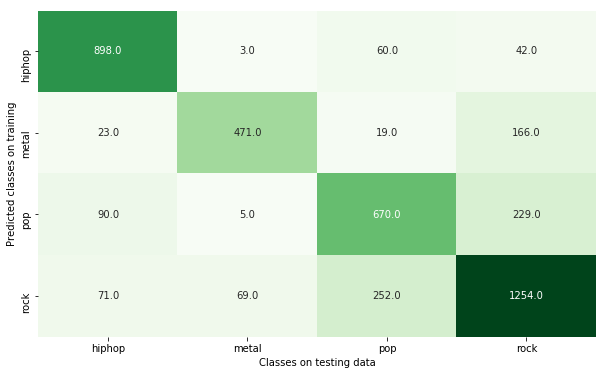

In [46]:
afx.plot_confusion_matrix(y_test_ppop, pr_class_ppop, genres)

In [47]:
print(classification_report(y_test_ppop, pr_class_ppop))

              precision    recall  f1-score   support

      hiphop       0.83      0.90      0.86      1003
       metal       0.86      0.69      0.77       679
         pop       0.67      0.67      0.67       994
        rock       0.74      0.76      0.75      1646

    accuracy                           0.76      4322
   macro avg       0.78      0.76      0.76      4322
weighted avg       0.76      0.76      0.76      4322



* Comente sobre el desempeño general de éste.

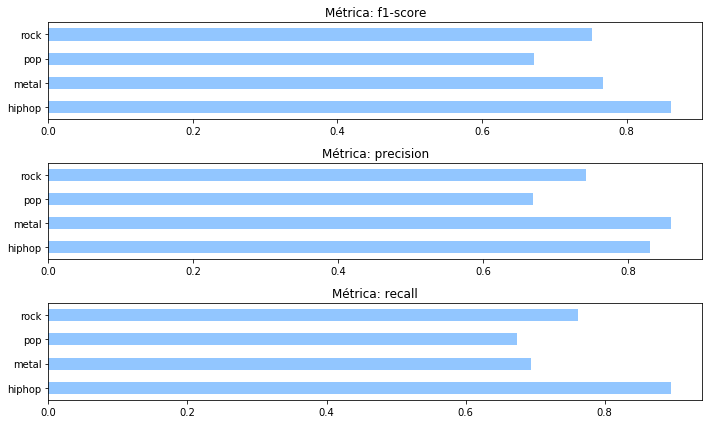

In [48]:
afx.plot_class_report(y_test_ppop, pr_class_ppop, genres)

>Al balancear la muestra agregando mas datos clasificados con la clase __pop__ logramos mejorar el modelo obteniendo mejores valores en las métricas de la clase __pop__, no obstante las métricas para __hiphop__ y __rock__ decayeron un poco.
>
>Podemos seguir pensando en mejorar el modelos aumentando la cantidad de datos, no obstante no olvidemos que las clases rock y pop no estan muy separadas lo que podría significar un límite en la mejora con esta técnica.